In [3]:
!pip install librosa
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB 393.8 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.0 MB 655.4 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.0 MB 952.6 kB/s eta 0:00:01
     -------- ------------------------------- 0.2/1.0 MB 1.

ModuleNotFoundError: No module named 'librosa'

In [4]:
from IPython.display import Audio

In [5]:
Ravdess = "C:\\Users\\jeeva\\Music\\audio_speech_actors"

In [6]:
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []

file_path = []
for i in ravdess_directory_list:
    actor = os.listdir(Ravdess +"/"+ i)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file is emotion
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess+"/" + i + '/' + file)
        
# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining 
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# int to emotion
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgusted', 8:'surprised'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
1,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
2,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
3,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
4,calm,C:\Users\jeeva\Music\audio_speech_actors/Actor...


In [7]:
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgusted', 8:'surprised'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
1,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
2,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
3,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
4,calm,C:\Users\jeeva\Music\audio_speech_actors/Actor...


In [8]:
df = pd.concat([Ravdess_df], axis = 0)
df.to_csv("data.csv",index=False)
df.head()

,Emotions,Path
0,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
1,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
2,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
3,neutral,C:\Users\jeeva\Music\audio_speech_actors/Actor...
4,calm,C:\Users\jeeva\Music\audio_speech_actors/Actor...


In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df["Emotions"].value_counts()

Emotions
calm         192
happy        192
sad          192
angry        192
fear         192
disgusted    192
surprised    192
neutral       96
Name: count, dtype: int64

(array([ 96., 192., 192.,   0., 192., 192.,   0., 192., 192., 192.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

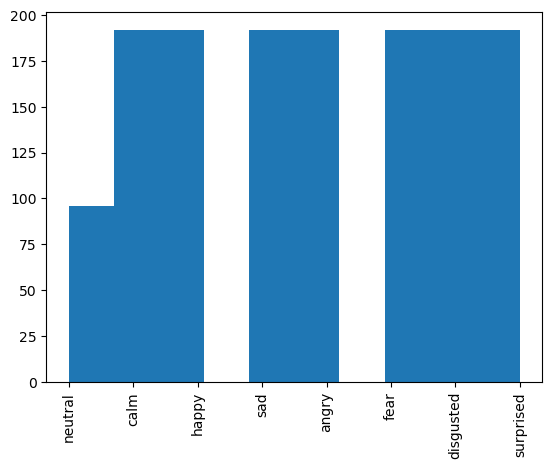

In [11]:
import matplotlib.pyplot as plt
plt.xticks( rotation='vertical')
plt.hist(df["Emotions"])

In [ ]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

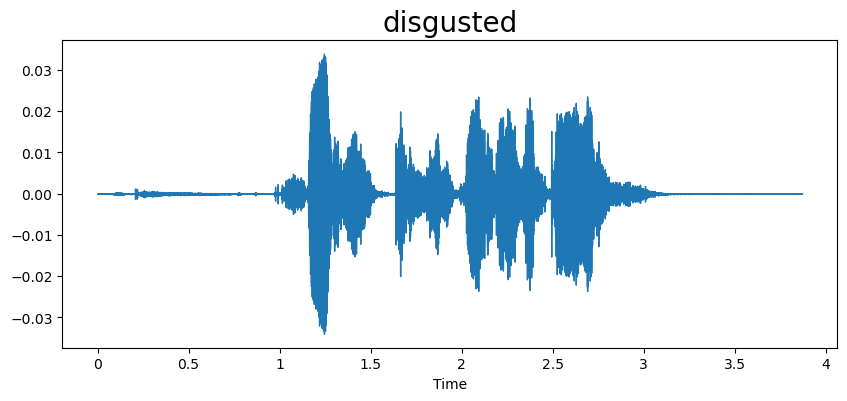

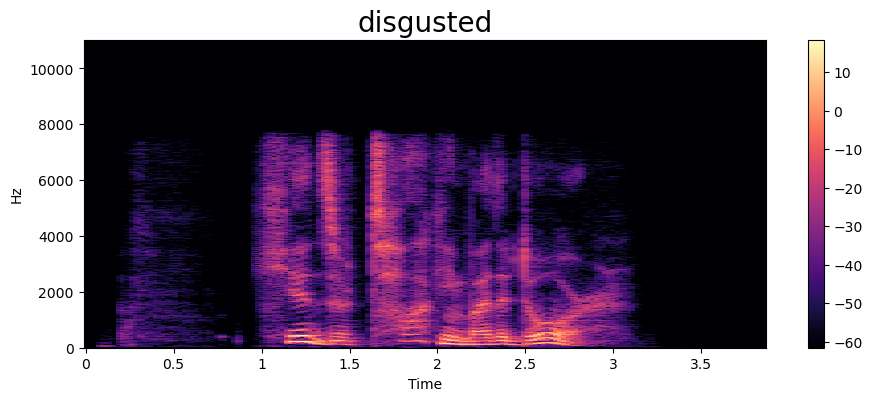

In [12]:
emotion=emot[0]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [10]:
emot=["disgusted","fear","sad","happy","angry","neutral","surprised","calm"]

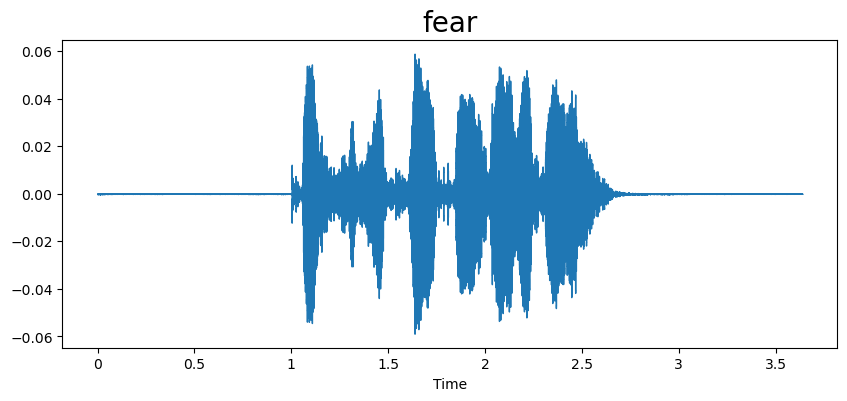

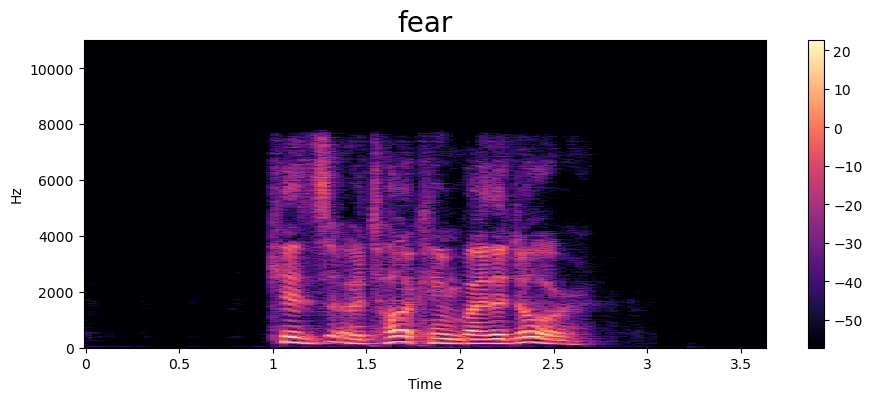

In [13]:
emotion=emot[1]
path=np.array(df["Path"][df["Emotions"]==emotion])[1]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

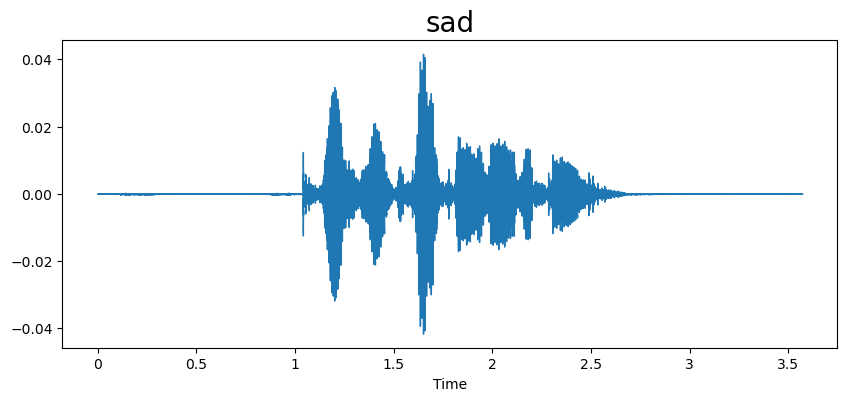

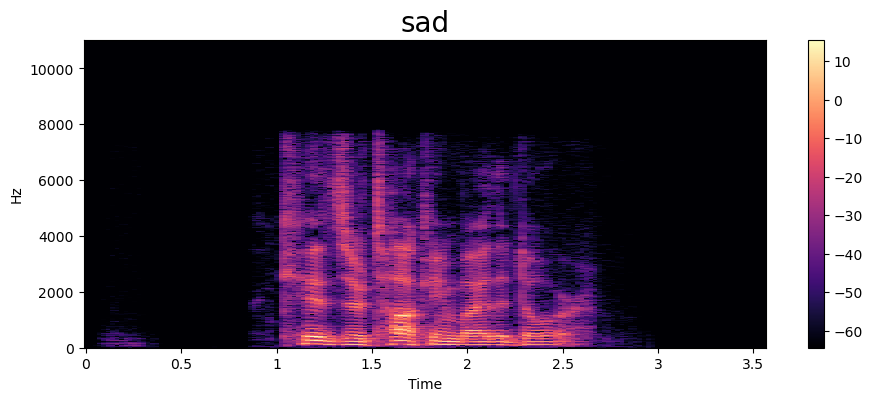

In [14]:
emotion=emot[2]
path=np.array(df["Path"][df["Emotions"]==emotion])[1]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

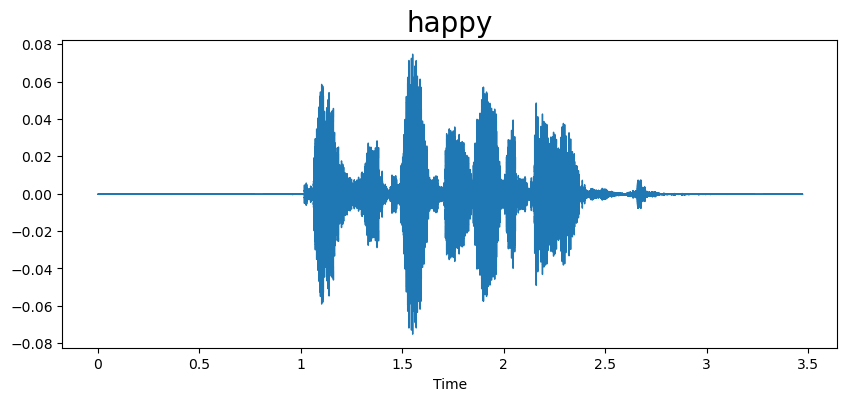

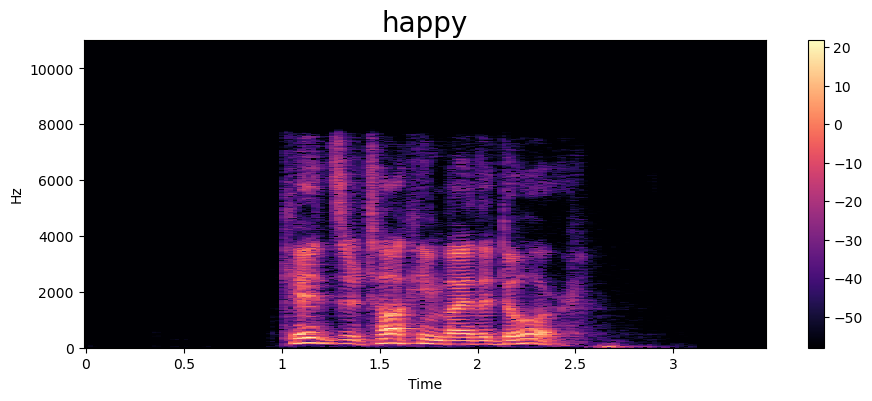

In [15]:
emotion=emot[3]
path=np.array(df["Path"][df["Emotions"]==emotion])[1]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

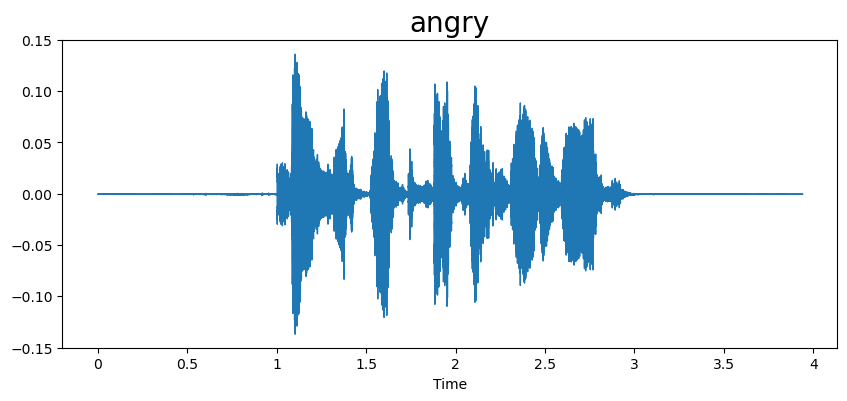

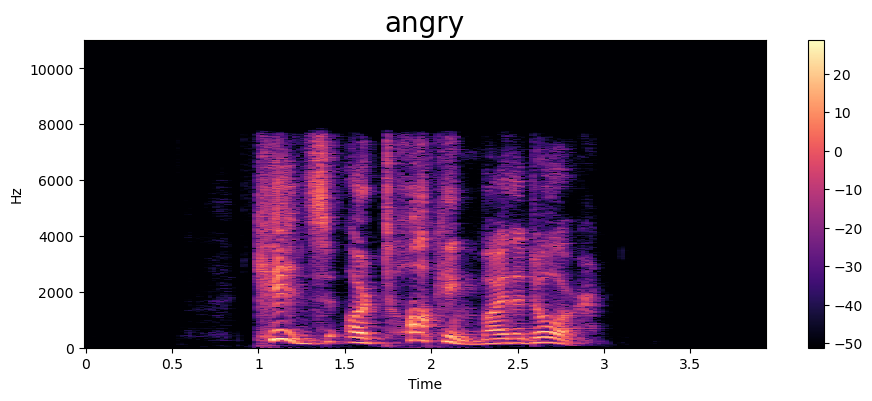

In [16]:
emotion=emot[4]
path=np.array(df["Path"][df["Emotions"]==emotion])[1]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

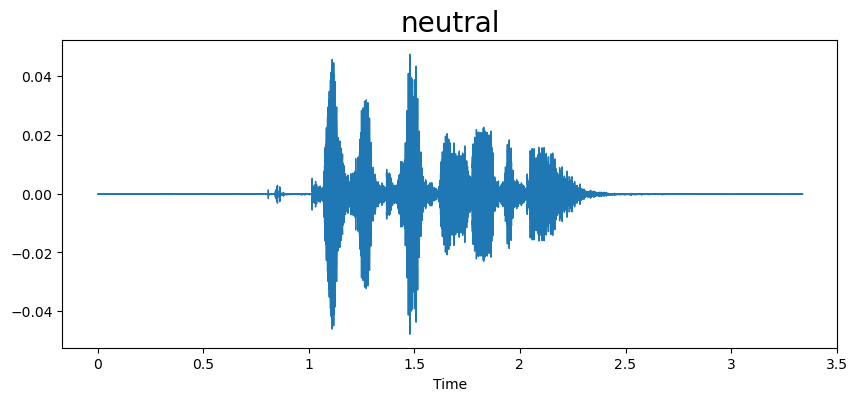

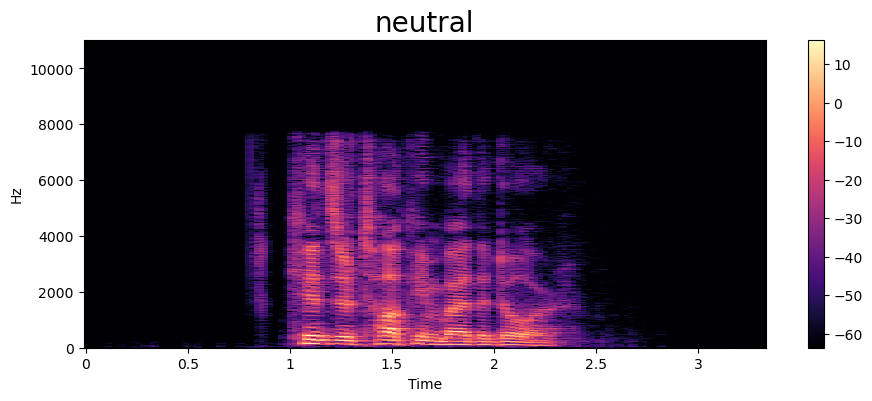

In [17]:
emotion=emot[5]
path=np.array(df["Path"][df["Emotions"]==emotion])[1]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

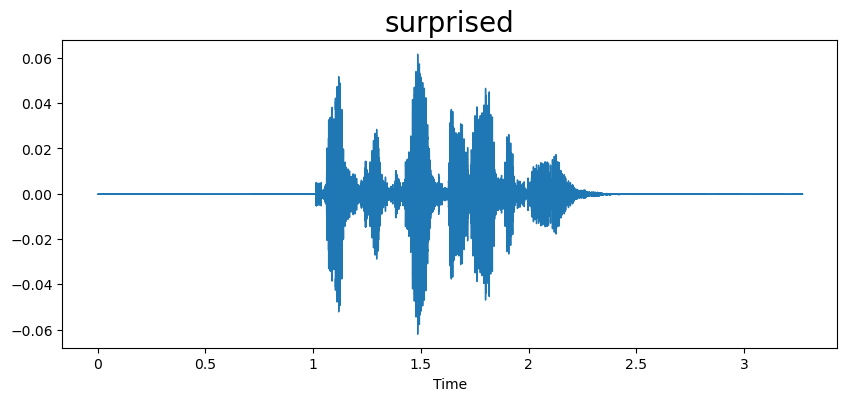

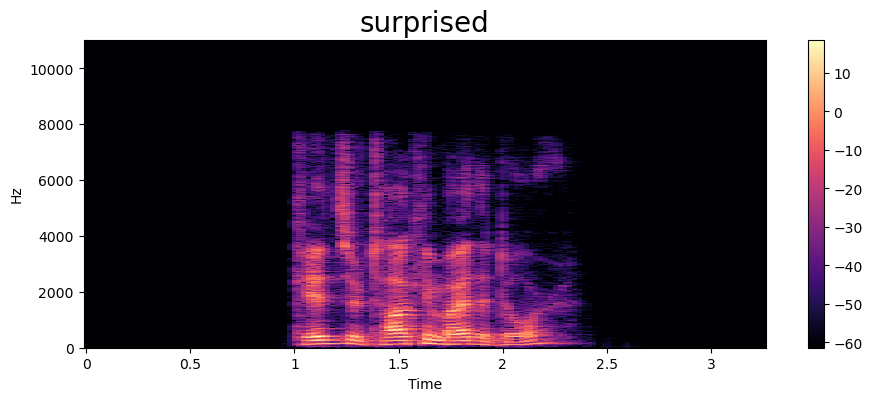

In [18]:
emotion=emot[6]
path=np.array(df["Path"][df["Emotions"]==emotion])[1]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

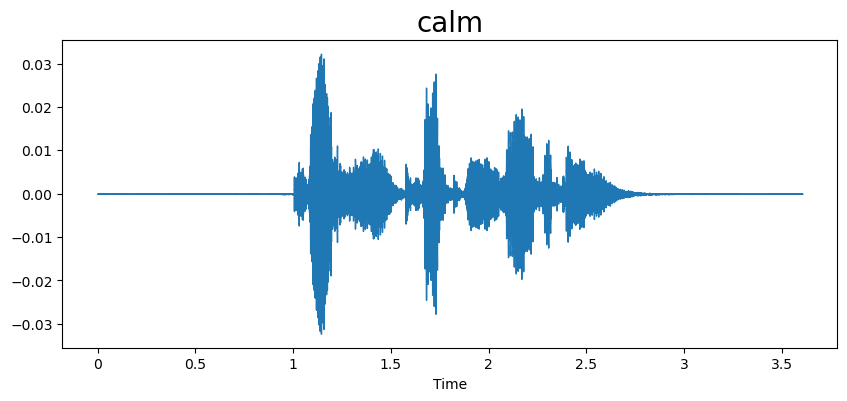

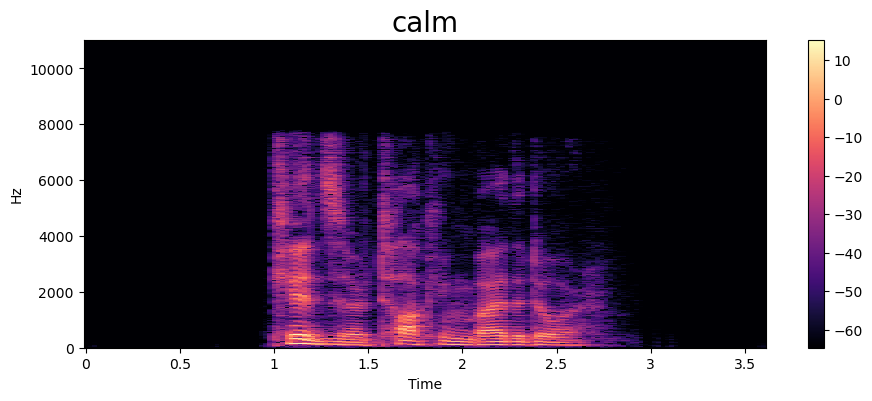

In [19]:
emotion=emot[7]
path=np.array(df["Path"][df["Emotions"]==emotion])[1]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [20]:
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data,rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)


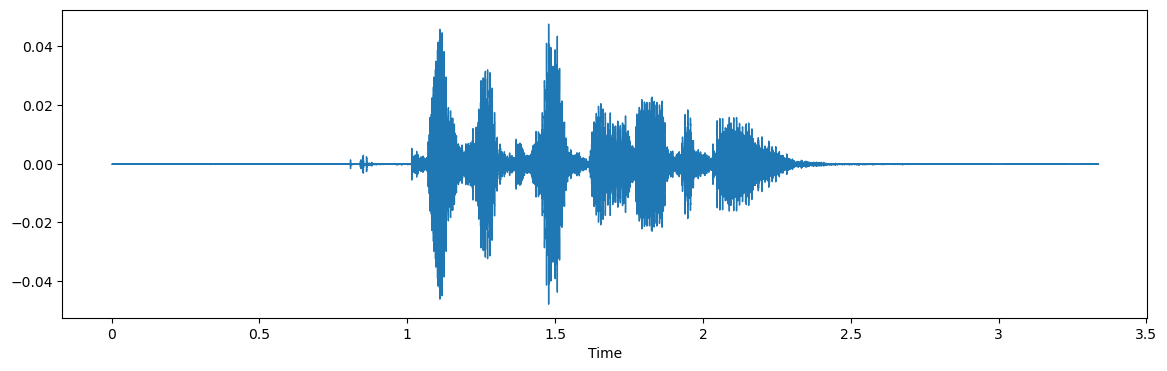

In [21]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

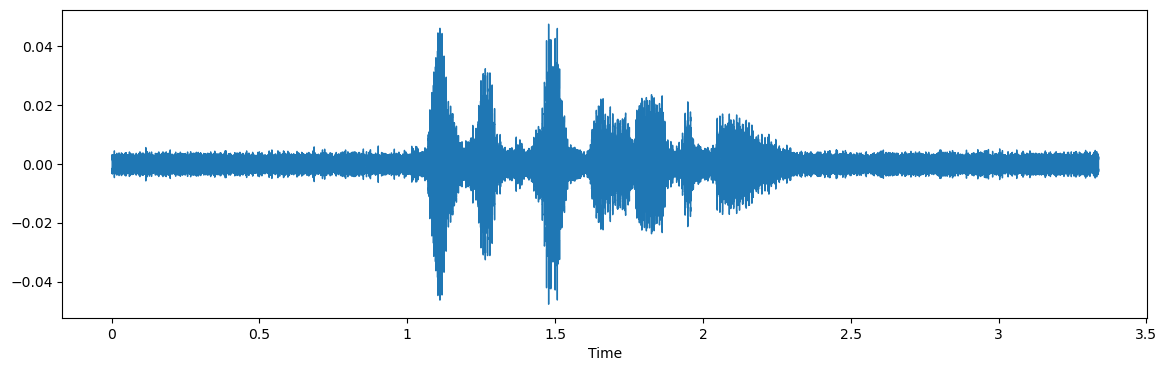

In [22]:
# noise
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

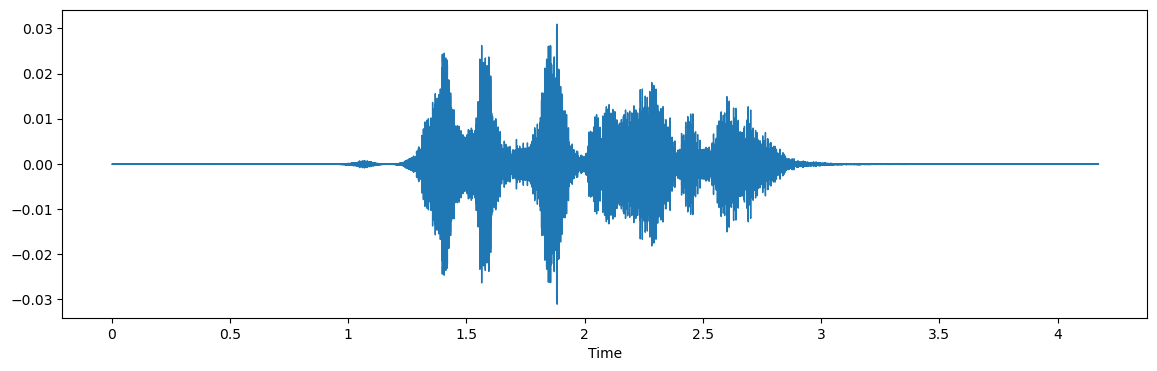

In [23]:
# stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

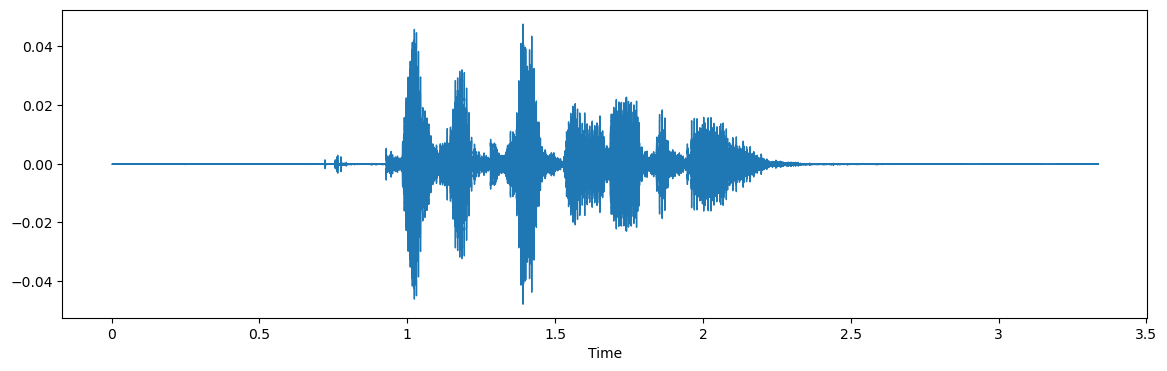

In [24]:
# shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

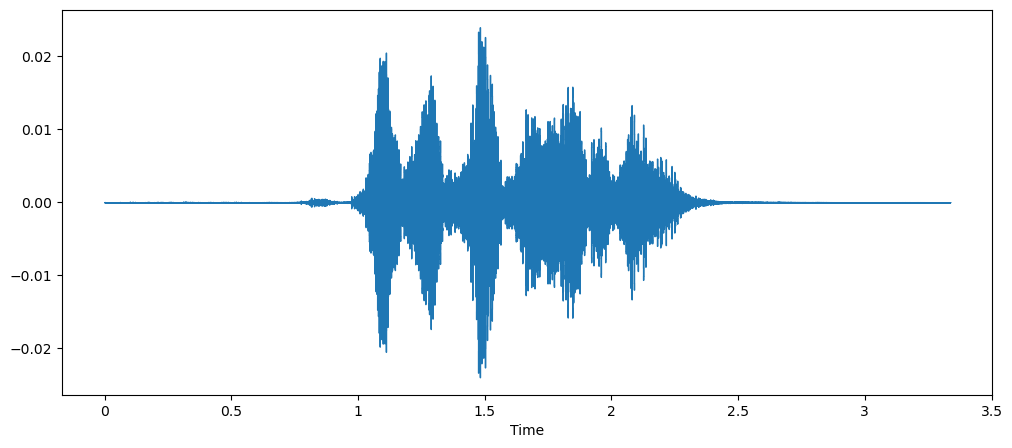

In [25]:
x = pitch(data, sample_rate)

plt.figure(figsize=(12, 5))
librosa.display.waveshow(x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [26]:
# def extractFeature(fileName, mfcc, chroma, mel):
#     with soundfile. SoundFile(fileName) as soundFile: 
#         X = soundFile.read(dtype="float32")
#         sampleRate=soundFile.samplerate
#         if chroma:
#             stft=np.abs(librosa.stft(X))
#         result-nup.array([])
#         if mfcc:
#             mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sampleRate, n_mfcc=40), axis=1)
#             result = np.hstack((result, mfccs))

#         if chroma:
#             stft = librosa.stft(X)
#             chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampleRate), axis=1)
#             result = np.hstack((result, chroma))

#         if mel:
#             mel = np.mean(librosa.feature.melspectrogram(X, sr=sampleRate), axis=1)
#             result = np.hstack((result, mel))
#     return result

In [27]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def get_features(path):
    # duration and offset are used to take care of 
#     the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) 
    
    # stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) 
    
    return result

In [28]:
X, Y = [], []

di=zip(df["Path"], df["Emotions"])
for path, emotion in di :
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [29]:
len(X), len(Y), df["Path"].shape

(4320, 4320, (1440,))

In [30]:
new_df = pd.DataFrame(X)
new_df['Emotions'] = Y
new_df.to_csv('dataframe.csv', index=False)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Emotions
0,0.252405,0.667188,0.695764,0.667365,0.675234,0.698576,0.686024,0.706901,0.749484,0.782826,...,2.438158e-16,1.668009e-16,1.217045e-16,1.040694e-16,1.001666e-16,1.068984e-16,2.113795e-16,2.461139e-16,8.922675e-17,neutral
1,0.321235,0.819793,0.835953,0.814996,0.811472,0.808271,0.699707,0.684459,0.724182,0.765806,...,7.116492e-05,6.810687e-05,6.851412e-05,6.980139e-05,7.115463e-05,6.615346e-05,6.685712e-05,6.801795e-05,6.582110e-05,neutral
2,0.162775,0.612487,0.636831,0.680768,0.637065,0.597717,0.644230,0.677121,0.701445,0.719366,...,1.467282e-16,9.305039e-17,5.845754e-17,5.408009e-17,4.863821e-17,4.322522e-17,4.713749e-17,3.093477e-17,1.161712e-17,neutral
3,0.218682,0.653719,0.695061,0.668355,0.653044,0.691417,0.691495,0.686064,0.738047,0.762083,...,4.833390e-17,3.569633e-17,3.280019e-17,4.279843e-17,5.439183e-17,7.460605e-17,2.295677e-16,2.263401e-16,6.190976e-17,neutral
4,0.289469,0.738039,0.794465,0.779758,0.742910,0.761320,0.725717,0.636260,0.689662,0.719185,...,1.963224e-05,1.864154e-05,1.888183e-05,2.005687e-05,1.886278e-05,1.952472e-05,2.004378e-05,2.053783e-05,2.053207e-05,neutral


In [31]:
X = new_df.iloc[: ,:-1].values
Y = new_df['Emotions'].values

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [33]:
from sklearn.model_selection import train_test_split
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20 , shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3456, 162), (3456, 8), (864, 162), (864, 8))

In [34]:
from sklearn.preprocessing import StandardScaler
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3456, 162), (3456, 8), (864, 162), (864, 8))

In [35]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3456, 162, 1), (3456, 8), (864, 162, 1), (864, 8))

In [37]:
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 160, 128)          512       
                                                                 
 max_pooling1d (MaxPooling1  (None, 160, 128)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 158, 256)          98560     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 158, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 156, 512)          393728    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 156, 512)          0

In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


es=EarlyStopping(monitor='val_accuracy',patience=3)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=3, min_lr=0.0000001)
model_22=model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test),callbacks=[rlrp,es])

Epoch 1/30
27/27 [==============================] - 24s 866ms/step - loss: 1.9467 - accuracy: 0.2225 - val_loss: 1.7980 - val_accuracy: 0.3287 - lr: 0.0010
Epoch 2/30
27/27 [==============================] - 23s 854ms/step - loss: 1.6761 - accuracy: 0.3469 - val_loss: 1.5071 - val_accuracy: 0.4595 - lr: 0.0010
Epoch 3/30
27/27 [==============================] - 23s 849ms/step - loss: 1.4227 - accuracy: 0.4734 - val_loss: 1.2737 - val_accuracy: 0.5394 - lr: 0.0010
Epoch 4/30
27/27 [==============================] - 23s 860ms/step - loss: 1.2061 - accuracy: 0.5483 - val_loss: 1.1538 - val_accuracy: 0.5949 - lr: 0.0010
Epoch 5/30
27/27 [==============================] - 23s 859ms/step - loss: 1.0198 - accuracy: 0.6282 - val_loss: 1.0433 - val_accuracy: 0.6227 - lr: 0.0010
Epoch 6/30
27/27 [==============================] - 23s 860ms/step - loss: 0.8565 - accuracy: 0.6997 - val_loss: 1.0018 - val_accuracy: 0.6354 - lr: 0.0010
Epoch 7/30
27/27 [==============================] - 23s 864ms/st

In [39]:
num_epochs=17

27/27 [==============================] - 1s 46ms/step - loss: 0.9667 - accuracy: 0.7824
Testing accuracy of our model:  78.24074029922485 %


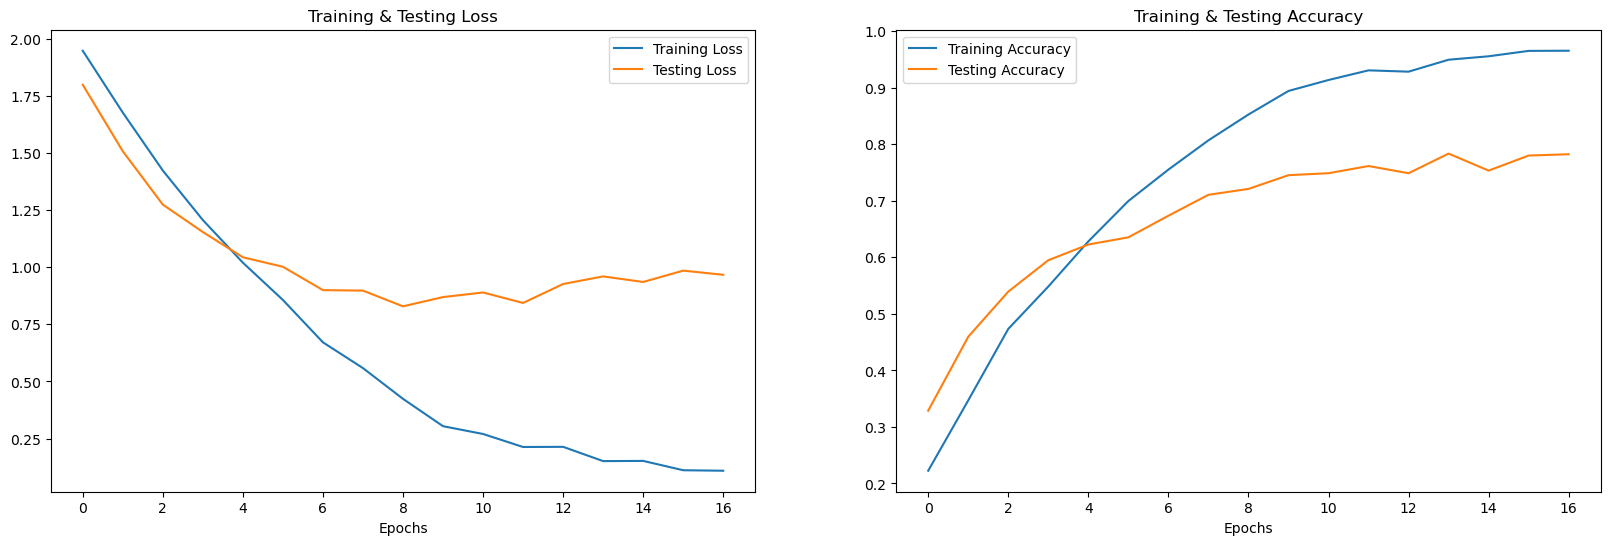

In [40]:
print("Testing accuracy of our model: " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(num_epochs)]
fig , ax = plt.subplots(1,2)
train_acc = model_22.history['accuracy']
train_loss = model_22.history['loss']
test_acc = model_22.history['val_accuracy']
test_loss = model_22.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [41]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

27/27 [==============================] - 1s 43ms/step


In [42]:
c_df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
c_df['Predicted Labels'] = y_pred.flatten()
c_df['Actual Labels'] = y_test.flatten()

In [46]:
c_df.sample(20)

,Predicted Labels,Actual Labels
70,calm,calm
330,fear,fear
75,sad,sad
662,happy,disgusted
311,calm,calm
820,calm,calm
137,disgusted,disgusted
468,calm,calm
375,surprised,disgusted
538,calm,calm


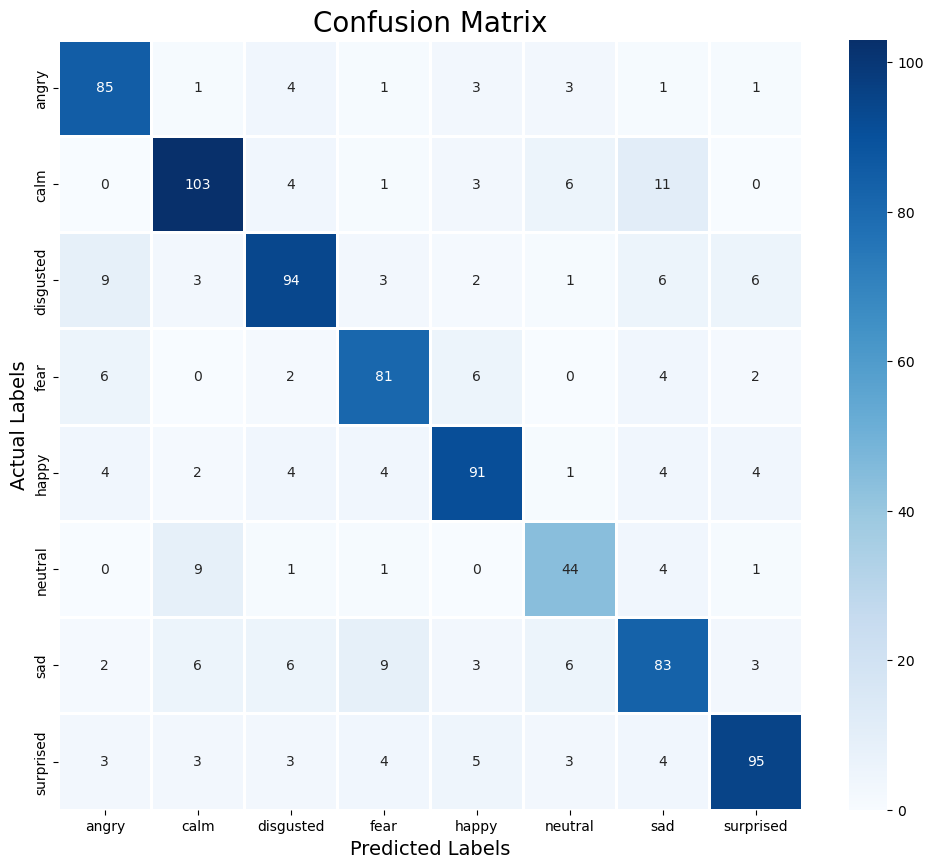

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.78      0.86      0.82        99
        calm       0.81      0.80      0.81       128
   disgusted       0.80      0.76      0.78       124
        fear       0.78      0.80      0.79       101
       happy       0.81      0.80      0.80       114
     neutral       0.69      0.73      0.71        60
         sad       0.71      0.70      0.71       118
   surprised       0.85      0.79      0.82       120

    accuracy                           0.78       864
   macro avg       0.78      0.78      0.78       864
weighted avg       0.78      0.78      0.78       864

